# AI - Project 05- Mohsen Fayyaz - 810196650

# Part 3

<b>Input:</b>


In [ ]:
def output(self):
    """
    Returns the output of this Input node.

    returns: number (float or int)
    """
    # raise NotImplementedError("Implement me!")
    return self.get_value()  # Output of input is it's value!

def dOutdX(self, elem):
    """
    Returns the derivative of this Input node with respect to 
    elem.

    elem: an instance of Weight

    returns: number (float or int)
    """
    return 0  # Derivative of Input with respect to w is 0
    # raise NotImplementedError("Implement me!")

<b>Neuron:</b><br>
o = s(z) = 1.0 / (1.0 + e**(-z)) <br>
ds(o)/dz = s(z) * (1 - s(z)) = o * (1 - o) <br>
wi' = wi + rate * dP / dwi <br>
$$ w_i = w_i+rate\frac{dP}{dw_i} $$
$$ \text{we need} \frac{dP}{dw_i} $$

In [ ]:
def compute_output(self):
    """
    Returns the output of this Neuron node, using a sigmoid as
    the threshold function.

    returns: number (float or int)
    """
    # raise NotImplementedError("Implement me!")
    z = 0  # Sigma of inputs
    inputs = self.get_inputs()
    weights = self.get_weights()
    for i in range(len(inputs)):
        current_input = inputs[i]
        current_weight = weights[i]
        z += current_weight.get_value() * current_input.output()
    return 1.0 / (1.0 + math.exp(-z))  # Sigmoid

def compute_doutdx(self, elem):
    """
    Returns the derivative of this Neuron node, with respect to weight
    elem, calling output() and/or dOutdX() recursively over the inputs.

    elem: an instance of Weight

    returns: number (float/int)
    """
    # raise NotImplementedError("Implement me!")
    out = self.output()
    octerm = out * (1 - out)

    if self.has_weight(elem):
        index = self.my_weights.index(elem)
        oa = self.get_inputs()[index].output()
        d = octerm * oa
    else:
        d = 0
        for i in range(len(self.get_weights())):
            current_weight = self.my_weights[i]
            if self.isa_descendant_weight_of(elem, current_weight):
                input_deriv = self.get_inputs()[i].dOutdX(elem)
                d += current_weight.get_value() * input_deriv
        d *= octerm
    return d

<b>PerformanceElem:</b><br>
P(o) = -0.5 (d - o)**2 = $ \frac{-1}{2} (d - o)^2 $<br>
dP(o)/dx = (d - o)

Chain Rule:
$$ \frac{dP(o)}{{dw}} = \frac{dP(o)}{{do}} \times \frac{do}{{dw}} $$

In [2]:
def output(self):
    """
    Returns the output of this PerformanceElem node.

    returns: number (float/int)
    """
    # raise NotImplementedError("Implement me!")
    return -0.5 * (self.my_desired_val - self.my_input.output()) ** 2

def dOutdX(self, elem):
    """
    Returns the derivative of this PerformanceElem node with respect
    to some weight, given by elem.

    elem: an instance of Weight

    returns: number (int/float)
    """
    # raise NotImplementedError("Implement me!")
    return (self.my_desired_val - self.my_input.output()) * self.my_input.dOutdX(elem)

# Part 4

In [ ]:
weights: [w1A(10.50), w2A(10.50), wA(14.37)]
Trained weights:
Weight 'w1A': 10.499844
Weight 'w2A': 10.499561
Weight 'wA': 14.366979
Testing on AND test-data
test((0.1, 0.1, 0)) returned: 4.704254617957318e-06 => 0 [correct]
test((0.1, 0.9, 0)) returned: 0.020484490369173127 => 0 [correct]
test((0.9, 0.1, 0)) returned: 0.02048903863720659 => 0 [correct]
test((0.9, 0.9, 1)) returned: 0.9893604979736043 => 1 [correct]
Accuracy: 1.000000

# Part 5) Finite Difference

In [ ]:
def finite_difference(network: Network, max_abs_diff=1e-4):
    def approx(w: Weight, f):
        eps = 1e-8
        network.clear_cache()
        f_now = f()
        w.set_value(w.get_value() + eps)
        network.clear_cache()
        f_eps = f()
        # print("f", f_now, f_eps)
        w.set_value(w.get_value() - eps)
        return (f_eps - f_now) / eps

    print("Starting finite difference test...")
    w: Weight
    for w in network.weights:
        aprx = approx(w, network.performance.output)
        print(aprx, "~", network.performance.dOutdX(w))
        if abs(aprx-network.performance.dOutdX(w)) < max_abs_diff:
            print(w.get_name(), "Passed")
        else:
            print(w.get_name(), "Failed")
    network.clear_cache()

Starting finite difference test... <br>
0.00010079509113209567 ~ 0.0001007951583241907 <br>
w1A Passed <br>
0.00010079509113209567 ~ 0.0001007951583241907 <br>
w2A Passed <br>
-0.00011199461226029522 ~ -0.00011199462454808667 <br>
wA Passed <br>


# Part 6) Two Layer Neural Net

<img src="https://ai6034.mit.edu/wiki/images/NeuralNet.png" />

In [ ]:
def make_neural_net_two_layer():
    """
    Create a 2-input, 1-output Network with three neurons.
    There should be two neurons at the first level, each receiving both inputs
    Both of the first level neurons should feed into the second layer neuron.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    # raise NotImplementedError("Implement me!")
    i0 = Input('i0', -1.0)  # this input is immutable
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    seed_random()
    wA = Weight('wA', random_weight())
    w1A = Weight('w1A', random_weight())
    w1B = Weight('w1B', random_weight())
    w2A = Weight('w2A', random_weight())
    w2B = Weight('w2B', random_weight())
    wB = Weight('wB', random_weight())

    wAC = Weight('wAC', random_weight())
    wBC = Weight('wBC', random_weight())
    wC = Weight('wC', random_weight())

    # Inputs must be in the same order as their associated weights
    A = Neuron('A', [i0, i1, i2], [wA, w1A, w2A])
    B = Neuron('B', [i0, i1, i2], [wB, w1B, w2B])
    C = Neuron('C', [i0, A, B], [wC, wAC, wBC])
    P = PerformanceElem(C, 0.0)

    # Package all the components into a network
    # First list the PerformanceElem P, Then list all neurons afterwards
    net = Network(P, [A, B, C])

    return net

Output:

In [ ]:


Testing on NOT_EQUAL test-data
test((0.1, 0.1, 0)) returned: 0.014027055868109088 => 0 [correct]
test((0.1, 0.9, 1)) returned: 0.9629008996400931 => 1 [correct]
test((0.9, 0.1, 1)) returned: 0.958716167356208 => 1 [correct]
test((0.9, 0.9, 0)) returned: 0.012724101231869693 => 0 [correct]
Accuracy: 1.000000


Testing on horizontal-bands test-data
test((1, 1.5, 1)) returned: 0.9926165484262569 => 1 [correct]
test((2, 1.5, 1)) returned: 0.9926713140960737 => 1 [correct]
test((3, 1.5, 1)) returned: 0.9927133766067088 => 1 [correct]
test((0, 1.5, 1)) returned: 0.9925497298192842 => 1 [correct]
test((4, 0, 0)) returned: 0.010260040354463422 => 0 [correct]
test((4, 4, 0)) returned: 0.004043905391348628 => 0 [correct]
test((-1, 0, 0)) returned: 0.01595953688731146 => 0 [correct]
test((-1, 4, 0)) returned: 0.004008407645210948 => 0 [correct]
Accuracy: 1.000000


Testing on vertical-bands test-data
test((0, 1, 0)) returned: 0.012528096542760691 => 0 [correct]
test((0, 2, 0)) returned: 0.011481094111501389 => 0 [correct]
test((0, 1.5, 0)) returned: 0.011962536571616068 => 0 [correct]
test((1.5, 2, 1)) returned: 0.9945713065773827 => 1 [correct]
test((1.5, 5, 1)) returned: 0.9946146986323833 => 1 [correct]
test((1.5, 1, 1)) returned: 0.9945258109449473 => 1 [correct]
test((3, 1, 0)) returned: 0.016161626430305623 => 0 [correct]
test((3, 1.5, 0)) returned: 0.016677522278454312 => 0 [correct]
test((3, 2, 0)) returned: 0.01722567447310357 => 0 [correct]
test((1, 1.5, 1)) returned: 0.9926784348537394 => 1 [correct]
test((1, -1.5, 1)) returned: 0.9942880833469689 => 1 [correct]
test((2, 1.5, 1)) returned: 0.9826706783108774 => 1 [correct]
test((2, -1.5, 1)) returned: 0.9771544882675249 => 1 [correct]
test((4, 0, 0)) returned: 0.0063551353753991974 => 0 [correct]
test((4, 4, 0)) returned: 0.006388119418897249 => 0 [correct]
test((-1, 0, 0)) returned: 0.008385950064542595 => 0 [correct]
test((-1, 4, 0)) returned: 0.008380595576999477 => 0 [correct]
Accuracy: 1.000000


Testing on diagonal-band test-data
test((-1, -1, 1)) returned: 0.9731239008761314 => 1 [correct]
test((5, 5, 1)) returned: 0.9838713368219906 => 1 [correct]
test((-2, -2, 1)) returned: 0.9669695950203144 => 1 [correct]
test((6, 6, 1)) returned: 0.9842941687827563 => 1 [correct]
test((3.5, 3.5, 1)) returned: 0.982902640098348 => 1 [correct]
test((1.5, 1.5, 1)) returned: 0.9804917128659673 => 1 [correct]
test((4, 0, 0)) returned: 0.009454613301417475 => 0 [correct]
test((0, 4, 0)) returned: 0.009557873946107213 => 0 [correct]
Accuracy: 1.000000


iter 1492: training complete.
mean-abs-performance threshold 0.0001 reached (0.000100)
weights: [wA(3.56), w1A(3.63), w2A(-3.94), wB(3.67), w1B(-4.02), w2B(3.72), wC(4.21), wAC(8.87), wBC(8.85)]
Trained weights:
Weight 'wA': 3.561586
Weight 'w1A': 3.632440
Weight 'w2A': -3.941064
Weight 'wB': 3.670820
Weight 'w1B': -4.019145
Weight 'w2B': 3.717343
Weight 'wC': 4.213936
Weight 'wAC': 8.865842
Weight 'wBC': 8.854844
Testing on inverse-diagonal-band test-data
test((-1, -1, 0)) returned: 0.026876099123868524 => 0 [correct]
test((5, 5, 0)) returned: 0.01612866317800943 => 0 [correct]
test((-2, -2, 0)) returned: 0.03303040497968543 => 0 [correct]
test((6, 6, 0)) returned: 0.0157058312172437 => 0 [correct]
test((3.5, 3.5, 0)) returned: 0.017097359901651926 => 0 [correct]
test((1.5, 1.5, 0)) returned: 0.019508287134032784 => 0 [correct]
test((4, 0, 1)) returned: 0.9905453866985825 => 1 [correct]
test((0, 4, 1)) returned: 0.9904421260538927 => 1 [correct]
Accuracy: 1.000000

Starting finite difference test...
0.0 ~ -3.244630780263565e-12
wA Passed
0.0 ~ 0.0
w1A Passed
0.0 ~ 1.2978523769980437e-11
w2A Passed
-1.0823048186836548e-08 ~ -1.0971107199119794e-08
wB Passed
0.0 ~ 0.0
w1B Passed
4.3931194402754836e-08 ~ 4.388442660145713e-08
w2B Passed
-9.04797714345023e-05 ~ -9.047981613085844e-05
wC Passed
0.0 ~ 3.6596984222631e-13
wAC Passed
9.047870959399962e-05 ~ 9.047857355163149e-05
wBC Passed

# Part 7) Plot Decision Boundary

In [2]:
import numpy as np


def alphabetize(x, y):
    if x.get_name() > y.get_name():
        return 1
    return -1


def abs_mean(values):
    """Compute the mean of the absolute values a set of numbers.
    For computing the stopping condition for training neural nets"""
    return np.mean(np.abs(values))


In [35]:
# Neural Net
# - In this file we have an incomplete skeleton of
# a neural network implementation.  Follow the instructions in the
# problem description and complete the NotImplemented methods below.
#
import math
import random
import functools
import numpy as np
from utility import alphabetize, abs_mean


class ValuedElement(object):
    """
    This is an abstract class that all Network elements inherit from
    """

    def __init__(self, name, val):
        self.my_name = name
        self.my_value = val

    def set_value(self, val):
        self.my_value = val

    def get_value(self):
        return self.my_value

    def get_name(self):
        return self.my_name

    def __repr__(self):
        return "%s(%1.2f)" % (self.my_name, self.my_value)


class DifferentiableElement(object):
    """
    This is an abstract interface class implemented by all Network
    parts that require some differentiable element.
    """

    def output(self):
        raise NotImplementedError("This is an abstract method")

    def dOutdX(self, elem):
        raise NotImplementedError("This is an abstract method")

    def clear_cache(self):
        """clears any precalculated cached value"""
        pass


class Input(ValuedElement, DifferentiableElement):
    """
    Representation of an Input into the network.
    These may represent variable inputs as well as fixed inputs
    (Thresholds) that are always set to -1.
    """

    def __init__(self, name, val):
        ValuedElement.__init__(self, name, val)
        DifferentiableElement.__init__(self)

    def output(self):
        """
        Returns the output of this Input node.
        
        returns: number (float or int)
        """
        # raise NotImplementedError("Implement me!")
        return self.get_value()  # Output of input is it's value!

    def dOutdX(self, elem):
        """
        Returns the derivative of this Input node with respect to 
        elem.

        elem: an instance of Weight

        returns: number (float or int)
        """
        return 0  # Derivative of Input with respect to w is 0
        # raise NotImplementedError("Implement me!")


class Weight(ValuedElement):
    """
    Representation of an weight into a Neural Unit.
    """

    def __init__(self, name, val):
        ValuedElement.__init__(self, name, val)
        self.next_value = None

    def set_next_value(self, val):
        self.next_value = val

    def update(self):
        self.my_value = self.next_value


class Neuron(DifferentiableElement):
    """
    Representation of a single sigmoid Neural Unit.
    """

    def __init__(self, name, inputs, input_weights, use_cache=True):
        assert len(inputs) == len(input_weights)
        for i in range(len(inputs)):
            assert isinstance(inputs[i], (Neuron, Input))
            assert isinstance(input_weights[i], Weight)
        DifferentiableElement.__init__(self)
        self.my_name = name
        self.my_inputs = inputs  # list of Neuron or Input instances
        self.my_weights = input_weights  # list of Weight instances
        self.use_cache = use_cache
        self.clear_cache()
        self.my_descendant_weights = None
        self.my_direct_weights = None

    def get_descendant_weights(self):
        """
        Returns a mapping of the names of direct weights into this neuron,
        to all descendant weights. For example if neurons [n1, n2] were connected
        to n5 via the weights [w1,w2], neurons [n3,n4] were connected to n6
        via the weights [w3,w4] and neurons [n5,n6] were connected to n7 via
        weights [w5,w6] then n7.get_descendant_weights() would return
        {'w5': ['w1','w2'], 'w6': ['w3','w4']}
        """
        if self.my_descendant_weights is None:
            self.my_descendant_weights = {}
            inputs = self.get_inputs()
            weights = self.get_weights()
            for i in range(len(weights)):
                weight = weights[i]
                weight_name = weight.get_name()
                self.my_descendant_weights[weight_name] = set()
                input = inputs[i]
                if not isinstance(input, Input):
                    descendants = input.get_descendant_weights()
                    for name, s in descendants.items():
                        st = self.my_descendant_weights[weight_name]
                        st = st.union(s)
                        st.add(name)
                        self.my_descendant_weights[weight_name] = st

        return self.my_descendant_weights

    def isa_descendant_weight_of(self, target, weight):
        """
        Checks if [target] is a indirect input weight into this Neuron
        via the direct input weight [weight].
        """
        weights = self.get_descendant_weights()
        if weight.get_name() in weights:
            return target.get_name() in weights[weight.get_name()]
        else:
            raise Exception("weight %s is not connect to this node: %s"
                            % (weight, self))

    def has_weight(self, weight):
        """
        Checks if [weight] is a direct input weight into this Neuron.
        """
        return weight.get_name() in self.get_descendant_weights()

    def get_weight_nodes(self):
        return self.my_weights

    def clear_cache(self):
        self.my_output = None
        self.my_doutdx = {}

    def output(self):
        # Implement compute_output instead!!
        if self.use_cache:
            # caching optimization, saves previously computed output.
            if self.my_output is None:
                self.my_output = self.compute_output()
            return self.my_output
        return self.compute_output()

    def compute_output(self):
        """
        Returns the output of this Neuron node, using a sigmoid as
        the threshold function.

        returns: number (float or int)
        """
        # raise NotImplementedError("Implement me!")
        z = 0  # Sigma of inputs
        inputs = self.get_inputs()
        weights = self.get_weights()
        for i in range(len(inputs)):
            current_input = inputs[i]
            current_weight = weights[i]
            z += current_weight.get_value() * current_input.output()
        return 1.0 / (1.0 + math.exp(-z))  # Sigmoid

    def dOutdX(self, elem):
        # Implement compute_doutdx instead!!
        if self.use_cache:
            # caching optimization, saves previously computed dOutdx.
            if elem not in self.my_doutdx:
                self.my_doutdx[elem] = self.compute_doutdx(elem)
            return self.my_doutdx[elem]
        return self.compute_doutdx(elem)

    def compute_doutdx(self, elem):
        """
        Returns the derivative of this Neuron node, with respect to weight
        elem, calling output() and/or dOutdX() recursively over the inputs.

        elem: an instance of Weight

        returns: number (float/int)
        """
        # raise NotImplementedError("Implement me!")
        out = self.output()
        octerm = out * (1 - out)

        if self.has_weight(elem):
            index = self.my_weights.index(elem)
            oa = self.get_inputs()[index].output()
            d = octerm * oa
        else:
            d = 0
            for i in range(len(self.get_weights())):
                current_weight = self.my_weights[i]
                if self.isa_descendant_weight_of(elem, current_weight):
                    input_deriv = self.get_inputs()[i].dOutdX(elem)
                    d += current_weight.get_value() * input_deriv
            d *= octerm
        return d

    def get_weights(self):
        return self.my_weights

    def get_inputs(self):
        return self.my_inputs

    def get_name(self):
        return self.my_name

    def __repr__(self):
        return "Neuron(%s)" % (self.my_name)


class PerformanceElem(DifferentiableElement):
    """
    Representation of a performance computing output node.
    This element contains methods for setting the
    desired output (d) and also computing the final
    performance P of the network.

    This implementation assumes a single output.
    """

    def __init__(self, input, desired_value):
        assert isinstance(input, (Input, Neuron))
        DifferentiableElement.__init__(self)
        self.my_input = input
        self.my_desired_val = desired_value

    def output(self):
        """
        Returns the output of this PerformanceElem node.
        
        returns: number (float/int)
        """
        # raise NotImplementedError("Implement me!")
        return -0.5 * (self.my_desired_val - self.my_input.output()) ** 2

    def dOutdX(self, elem):
        """
        Returns the derivative of this PerformanceElem node with respect
        to some weight, given by elem.

        elem: an instance of Weight

        returns: number (int/float)
        """
        # raise NotImplementedError("Implement me!")
        return (self.my_desired_val - self.my_input.output()) * self.my_input.dOutdX(elem)

    def set_desired(self, new_desired):
        self.my_desired_val = new_desired

    def get_input(self):
        return self.my_input


class Network(object):
    def __init__(self, performance_node: PerformanceElem, neurons):
        self.inputs = []
        self.weights = []
        self.performance = performance_node
        self.output = performance_node.get_input()
        self.neurons = neurons[:]
        self.neurons.sort(key=functools.cmp_to_key(alphabetize))
        for neuron in self.neurons:
            self.weights.extend(neuron.get_weights())
            for i in neuron.get_inputs():
                if isinstance(i, Input) and not ('i0' in i.get_name()) and not i in self.inputs:
                    self.inputs.append(i)
        self.weights.reverse()
        self.weights = []
        for n in self.neurons:
            self.weights += n.get_weight_nodes()

    @classmethod
    def from_layers(self, performance_node, layers):
        neurons = []
        for layer in layers:
            if layer.get_name() != 'l0':
                neurons.extend(layer.get_elements())
        return Network(performance_node, neurons)

    def clear_cache(self):
        for n in self.neurons:
            n.clear_cache()


def seed_random():
    """Seed the random number generator so that random
    numbers are deterministically 'random'"""
    random.seed(0)
    np.random.seed(0)


def random_weight():
    """Generate a deterministic random weight"""
    # We found that random.randrange(-1,2) to work well emperically 
    # even though it produces randomly 3 integer values -1, 0, and 1.
    return random.randrange(-1, 2)

    # Uncomment the following if you want to try a uniform distribuiton 
    # of random numbers compare and see what the difference is.
    # return random.uniform(-1, 1)

    # When training larger networks, initialization with small, random
    # values centered around 0 is also common, like the line below:
    # return np.random.normal(0,0.1)


def make_neural_net_basic():
    """
    Constructs a 2-input, 1-output Network with a single neuron.
    This network is used to test your network implementation
    and a guide for constructing more complex networks.

    Naming convention for each of the elements:

    Input: 'i'+ input_number
    Example: 'i1', 'i2', etc.
    Conventions: Start numbering at 1.
                 For the -1 inputs, use 'i0' for everything

    Weight: 'w' + from_identifier + to_identifier
    Examples: 'w1A' for weight from Input i1 to Neuron A
              'wAB' for weight from Neuron A to Neuron B

    Neuron: alphabet_letter
    Convention: Order names by distance to the inputs.
                If equal distant, then order them left to right.
    Example:  'A' is the neuron closest to the inputs.

    All names should be unique.
    You must follow these conventions in order to pass all the tests.
    """
    i0 = Input('i0', -1.0)  # this input is immutable
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    w1A = Weight('w1A', 1)
    w2A = Weight('w2A', 1)
    wA = Weight('wA', 1)

    # Inputs must be in the same order as their associated weights
    A = Neuron('A', [i1, i2, i0], [w1A, w2A, wA])
    P = PerformanceElem(A, 0.0)

    # Package all the components into a network
    # First list the PerformanceElem P, Then list all neurons afterwards
    net = Network(P, [A])

    return net


def make_neural_net_two_layer():
    """
    Create a 2-input, 1-output Network with three neurons.
    There should be two neurons at the first level, each receiving both inputs
    Both of the first level neurons should feed into the second layer neuron.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    # raise NotImplementedError("Implement me!")
    i0 = Input('i0', -1.0)  # this input is immutable
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    seed_random()
    wA = Weight('wA', random_weight())
    w1A = Weight('w1A', random_weight())
    w1B = Weight('w1B', random_weight())
    w2A = Weight('w2A', random_weight())
    w2B = Weight('w2B', random_weight())
    wB = Weight('wB', random_weight())

    wAC = Weight('wAC', random_weight())
    wBC = Weight('wBC', random_weight())
    wC = Weight('wC', random_weight())

    # Inputs must be in the same order as their associated weights
    A = Neuron('A', [i0, i1, i2], [wA, w1A, w2A])
    B = Neuron('B', [i0, i1, i2], [wB, w1B, w2B])
    C = Neuron('C', [i0, A, B], [wC, wAC, wBC])
    P = PerformanceElem(C, 0.0)

    # Package all the components into a network
    # First list the PerformanceElem P, Then list all neurons afterwards
    net = Network(P, [A, B, C])

    return net

def make_neural_net_challenging():
    """
    Design a network that can in-theory solve all 3 problems described in
    the lab instructions.  Your final network should contain
    at most 5 neuron units.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    raise NotImplementedError("Implement me!")


def make_neural_net_two_moons():
    """
    Create an overparametrized network with 40 neurons in the first layer
    and a single neuron in the last. This network is more than enough to solve
    the two-moons dataset, and as a result will over-fit the data if trained
    excessively.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    raise NotImplementedError("Implement me!")


def train(network,
          data,  # training data
          rate=1.0,  # learning rate
          target_abs_mean_performance=0.0001,
          max_iterations=10000,
          verbose=False):
    """Run back-propagation training algorithm on a given network.
    with training [data].   The training runs for [max_iterations]
    or until [target_abs_mean_performance] is reached.
    """

    iteration = 0
    while iteration < max_iterations:
        fully_trained = False
        performances = []  # store performance on each data point
        for datum in data:
            # set network inputs
            for i in range(len(network.inputs)):
                network.inputs[i].set_value(datum[i])

            # set network desired output
            network.performance.set_desired(datum[-1])

            # clear cached calculations
            network.clear_cache()

            # compute all the weight updates
            for w in network.weights:
                w.set_next_value(w.get_value() +
                                 rate * network.performance.dOutdX(w))

            # set the new weights
            for w in network.weights:
                w.update()

            # save the performance value
            performances.append(network.performance.output())

            # clear cached calculations
            network.clear_cache()

        # compute the mean performance value
        abs_mean_performance = abs_mean(performances)

        if abs_mean_performance < target_abs_mean_performance:
            if verbose:
                print("iter %d: training complete.\n" \
                      "mean-abs-performance threshold %s reached (%1.6f)" \
                      % (iteration,
                         target_abs_mean_performance,
                         abs_mean_performance))
            break

        iteration += 1

        if iteration % 10 == 0 and verbose:
            print("iter %d: mean-abs-performance = %1.6f" \
                  % (iteration,
                     abs_mean_performance))

    print('weights:', network.weights)
    # plot_decision_boundary(network, data)


def test(network, data, verbose=False):
    """Test the neural net on some given data."""
    correct = 0
    for datum in data:

        for i in range(len(network.inputs)):
            network.inputs[i].set_value(datum[i])

        # clear cached calculations
        network.clear_cache()

        result = network.output.output()
        prediction = round(result)

        network.clear_cache()

        if prediction == datum[-1]:
            correct += 1
            if verbose:
                print("test(%s) returned: %s => %s [%s]" % (str(datum),
                                                            str(result),
                                                            datum[-1],
                                                            "correct"))
        else:
            if verbose:
                print("test(%s) returned: %s => %s [%s]" % (str(datum),
                                                            str(result),
                                                            datum[-1],
                                                            "wrong"))

    return float(correct) / len(data)


def finite_difference(network: Network, max_abs_diff=1e-4):
    def approx(w: Weight, f):
        eps = 1e-8
        network.clear_cache()
        f_now = f()
        w.set_value(w.get_value() + eps)
        network.clear_cache()
        f_eps = f()
        # print("f", f_now, f_eps)
        w.set_value(w.get_value() - eps)
        return (f_eps - f_now) / eps

    print("Starting finite difference test...")
    w: Weight
    for w in network.weights:
        aprx = approx(w, network.performance.output)
        print(aprx, "~", network.performance.dOutdX(w))
        if abs(aprx-network.performance.dOutdX(w)) < max_abs_diff:
            print(w.get_name(), "Passed")
        else:
            print(w.get_name(), "Failed")
    network.clear_cache()

In [36]:
#
# Training and Test Data used in neural_net_tester.py
#
import pandas as pd
"""
1++
0-+
 01
"""
or_data = ((0,0,0),
           (0,1,1),
           (1,0,1),
           (1,1,1),
           (0.25,0,0),
           (0,0.25,0))

or_test_data = ((0.1,0.1,0),
                (0.1,0.9,1),
                (0.9,0.1,1),
                (0.9,0.9,1))
"""
1-+
0--
 01
"""
and_data = ((0,0,0),
            (0,1,0),
            (1,0,0),
            (1,1,1),
            (0.75,1.0,1),
            (1.0,0.75,1))

and_test_data = ((0.1,0.1,0),
                 (0.1,0.9,0),
                 (0.9,0.1,0),
                 (0.9,0.9,1))

"""
1-+
0+-
 01
"""
equal_data = ((0,0,1),
              (0,1,0),
              (1,0,0),
              (1,1,1))

equal_test_data = ((0.1,0.1,1),
                   (0.1,0.9,0),
                   (0.9,0.1,0),
                   (0.9,0.9,1))

"""
1+-
0-+
 01
"""
neq_data = ((0,0,0),
            (0,1,1),
            (1,0,1),
            (1,1,0))

neq_test_data = ((0.1,0.1,0),
                 (0.1,0.9,1),
                 (0.9,0.1,1),
                 (0.9,0.9,0))


"""
3-++-
2-++-
1-++-
0-++-
 0123
"""
vert_band_data = ((0,0,0),
                  (0,1,0),
                  (0,2,0),
                  (0,3,0),
                  (1,0,1),
                  (1,1,1),
                  (1,2,1),
                  (1,3,1),
                  (2,0,1),
                  (2,1,1),
                  (2,2,1),
                  (2,3,1),
                  (3,0,0),
                  (3,1,0),
                  (3,2,0),
                  (3,3,0))

vert_band_test_data = ((0,    1, 0),
                        (0,    2, 0),
                        (0,  1.5, 0),

                        (1.5,  2, 1),
                        (1.5,  5, 1),
                        (1.5,  1, 1),

                        (3,    1, 0),
                        (3,  1.5, 0),
                        (3,    2, 0),

                        (1,  1.5, 1),
                        (1, -1.5, 1),
                        (2,  1.5, 1),
                        (2, -1.5, 1),

                        (4,  0,   0),
                        (4,  4,   0),
                        (-1, 0,   0),
                        (-1, 4,   0))

"""
3----
2++++
1++++
0----
 0123
"""
horiz_band_data = ((0,0,0),
                   (0,1,1),
                   (0,2,1),
                   (0,3,0),
                   (1,0,0),
                   (1,1,1),
                   (1,2,1),
                   (1,3,0),
                   (2,0,0),
                   (2,1,1),
                   (2,2,1),
                   (2,3,0),
                   (3,0,0),
                   (3,1,1),
                   (3,2,1),
                   (3,3,0))

horiz_band_test_data = ((1, 1.5, 1),
                        (2, 1.5, 1),
                        (3, 1.5, 1),
                        (0, 1.5, 1),
                        (4,   0, 0),
                        (4,   4, 0),
                        (-1,  0, 0),
                        (-1,  4, 0))

"""
4--- +
3-- +
2- + -
1 + --
0+ ---
 01234
"""
diag_band_data = ((0,0,1),
                  (1,1,1),
                  (2,2,1),
                  (3,3,1),
                  (4,4,1),
                  (0,4,0),
                  (4,0,0),
                  (0,3,0),
                  (3,0,0),
                  (0,2,0),
                  (2,0,0),
                  (1,4,0),
                  (4,1,0),
                  (1,3,0),
                  (3,1,0),
                  (2,4,0),
                  (4,2,0),
                  )

diag_band_test_data = ((-1,-1,1),
                       (5,  5,1),
                       (-2,-2,1),
                       (6,  6,1),
                       (3.5,3.5,1),
                       (1.5,1.5,1),
                       (4,  0,0),
                       (0,  4,0))

"""
4+++ -
3++ -
2+ - +
1 - ++
0- +++
 01234
"""
idiag_band_data = ((0,0,0),
                   (1,1,0),
                   (2,2,0),
                   (3,3,0),
                   (4,4,0),
                   (0,4,1),
                   (4,0,1),
                   (0,3,1),
                   (3,0,1),
                   (0,2,1),
                   (2,0,1),
                   (1,4,1),
                   (4,1,1),
                   (1,3,1),
                   (3,1,1),
                   (2,4,1),
                   (4,2,1),
                   )

idiag_band_test_data = ((-1,-1,0),
                        (5,  5,0),
                        (-2,-2,0),
                        (6,  6,0),
                        (3.5,3.5,0),
                        (1.5,1.5,0),
                        (4,  0,1),
                        (0,  4,1))


"""
4-----
3-   -
2- + -
1-   -
0-----
 01234
"""
moat_data = ((0,0,0),
             (1,0,0),
             (2,0,0),
             (3,0,0),
             (4,0,0),

             (1,1,0),
             (4,1,0),

             (1,2,0),
             (3,3,1),
             (4,2,0),

             (1,4,0),
             (4,4,0),

             (0,4,0),
             (1,4,0),
             (2,4,0),
             (3,4,0),
             (4,4,0),
             )

moat_test_data = moat_data

"""
4+-
3+-
2+-
1+----
0-++++
 01234
"""
letter_l_data = ((0,0,0),
                 (1,0,1),
                 (2,0,1),
                 (3,0,1),
                 (4,0,1),

                 (1,1,0),
                 (2,1,0),
                 (3,1,0),
                 (4,1,0),

                 (0,2,1),
                 (1,2,0),

                 (0,3,1),
                 (1,3,0),

                 (0,4,1),
                 (1,4,0),
                 )

letter_l_test_data = letter_l_data

def load_csv(filename):
  df = pd.read_csv(filename)
  data = []
  for _, row in df.iterrows():
    row = row.tolist()
    data.append(row)
  return data

two_moons_data = load_csv('two-moons/train.csv')
two_moons_test_data = load_csv('two-moons/test.csv')


simple_data_sets = [("OR", or_data, or_test_data),
                    ("AND", and_data, and_test_data)
                    ]

harder_data_sets = [("EQUAL", equal_data, equal_test_data),
                    ("NOT_EQUAL", neq_data, neq_test_data),
                    ("horizontal-bands", horiz_band_data, horiz_band_test_data),
                    ("vertical-bands", vert_band_data, vert_band_test_data),
                    ("diagonal-band", diag_band_data, diag_band_test_data),
                    ("inverse-diagonal-band", idiag_band_data,
                     idiag_band_test_data)
                    ]

challenging_data_sets = [("moat", moat_data, moat_test_data),
                         ("letter-l", letter_l_data, letter_l_test_data),
                         ]

two_moons_data_set = [("two-moons", two_moons_data, two_moons_test_data)]

all_data_sets = simple_data_sets + harder_data_sets + challenging_data_sets + \
                two_moons_data_set


## neural_net_tester.py

In [117]:
# Unit tester for neural_net.py
#
import sys

from neural_net import train, test, \
    make_neural_net_basic, \
    make_neural_net_two_layer, \
    make_neural_net_challenging, \
    make_neural_net_two_moons, \
    finite_difference, \
    plot_decision_boundary

from neural_net_data import simple_data_sets, \
    harder_data_sets, \
    challenging_data_sets, \
    two_moons_data_set, \
    all_data_sets


def main(neural_net_func, data_sets, rate=1.0, max_iterations=10000, plot_boundry=10):
    verbose = False
    for name, training_data, test_data in data_sets:
        print("-" * 40)
        print("Training on %s data" % (name))
        nn = neural_net_func()
        train(nn, training_data, rate=rate, max_iterations=max_iterations,
              verbose=verbose)
        print("Trained weights:")
        for w in nn.weights:
            print("Weight '%s': %f" % (w.get_name(), w.get_value()))
        print("Testing on %s test-data" % (name))
        result = test(nn, test_data, verbose=verbose)
        print("Accuracy Test Data: %f" % (result))

        # Mohsen was here
        result = test(nn, training_data, verbose=verbose)
        print("Accuracy Train Data: %f" % (result))
        if verbose:
            finite_difference(nn)
        plot_decision_boundary(nn, -plot_boundry, plot_boundry, -plot_boundry, plot_boundry, training_data, title="Training Data")
        plot_decision_boundary(nn, -plot_boundry, plot_boundry, -plot_boundry, plot_boundry, test_data, title="Test Data")
        # Mohsen was here


if __name__ == "__main__":
    test_names = ["simple"]
    if len(sys.argv) > 1:
        test_names = sys.argv[1:]

    for test_name in test_names:
        if test_name == "simple":
            # these test simple logical configurations
            main(make_neural_net_basic,
                 simple_data_sets)

        elif test_name == "two_layer":
            # these test cases are slightly harder
            main(make_neural_net_two_layer,
                 simple_data_sets + harder_data_sets)

        elif test_name == "challenging":
            # these tests require a more complex architecture.
            main(make_neural_net_challenging, challenging_data_sets)

        elif test_name == "two_moons":
            # this dataset illustrates the overfitting problem
            main(make_neural_net_two_moons, two_moons_data_set, max_iterations=1000)

        else:
            print("unrecognized test name %s" % (test_name))


unrecognized test name -f
unrecognized test name C:\Users\Mohsen\AppData\Roaming\jupyter\runtime\kernel-8381059a-8d81-4f50-8471-c4c498c2907c.json


In [118]:
import matplotlib.pyplot as plt
def plot_decision_boundary(network: Network, xmin, xmax, ymin, ymax, data=None, title=""):
    interval = (xmax - xmin) / 200
    a_points = list()
    b_points = list()
    for x in np.arange(xmin, xmax, interval):
        for y in np.arange(ymin, ymax, interval):
            network.inputs[0].set_value(x)
            network.inputs[1].set_value(y)
            # clear cached calculations
            network.clear_cache()
            result = network.output.output()
            if result > 0.5:
                a_points.append((x, y))
            else:
                b_points.append((x, y))

            network.clear_cache()

    x = list(map(lambda x: x[0], a_points))
    y = list(map(lambda x: x[1], a_points))
    plt.scatter(x, y, color="lightgreen", alpha=0.1)
    x = list(map(lambda x: x[0], b_points))
    y = list(map(lambda x: x[1], b_points))
    plt.scatter(x, y, color="linen", alpha=0.1)

    if data is not None:
        a_class = list()
        b_class = list()
        for datum in data:
            # for i in range(len(network.inputs)):
            #     network.inputs[i].set_value(datum[i])
            # network.clear_cache()
            # result = network.output.output()
            # prediction = round(result)
            if datum[2] == 1:
                a_class.append((datum[0], datum[1]))
                plt.scatter(datum[0], datum[1], color="green", alpha=1)
            else:
                b_class.append((datum[0], datum[1]))
                plt.scatter(datum[0], datum[1], color="coral", alpha=1)

    plt.grid(True)
    plt.title(title)
    plt.show()


----------------------------------------
Training on OR data
weights: [w1A(10.78), w2A(10.78), wA(6.69)]
Trained weights:
Weight 'w1A': 10.777776
Weight 'w2A': 10.778222
Weight 'wA': 6.686619
Testing on OR test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


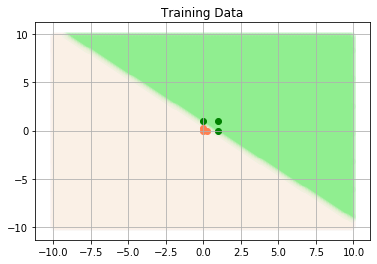

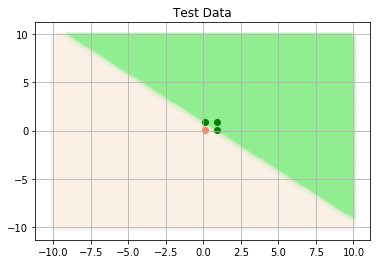

----------------------------------------
Training on AND data
weights: [w1A(10.50), w2A(10.50), wA(14.37)]
Trained weights:
Weight 'w1A': 10.499844
Weight 'w2A': 10.499561
Weight 'wA': 14.366979
Testing on AND test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


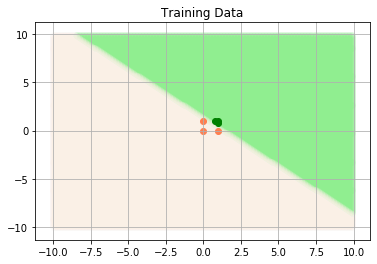

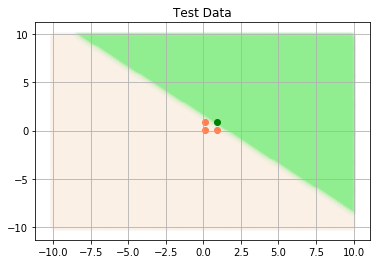

In [119]:
main(make_neural_net_basic, simple_data_sets)

----------------------------------------
Training on OR data
weights: [wA(-2.27), w1A(-3.97), w2A(-3.85), wB(2.22), w1B(3.78), w2B(3.91), wC(0.20), wAC(-6.71), wBC(6.38)]
Trained weights:
Weight 'wA': -2.267522
Weight 'w1A': -3.973050
Weight 'w2A': -3.854735
Weight 'wB': 2.222257
Weight 'w1B': 3.782480
Weight 'w2B': 3.910078
Weight 'wC': 0.201674
Weight 'wAC': -6.710796
Weight 'wBC': 6.377184
Testing on OR test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


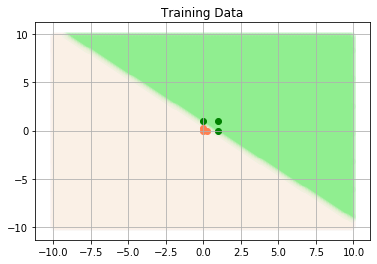

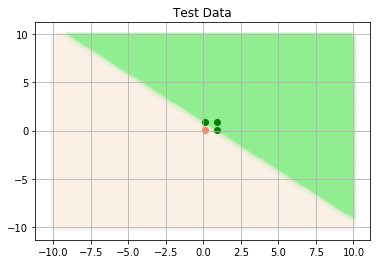

----------------------------------------
Training on AND data
weights: [wA(-3.66), w1A(-2.46), w2A(-4.09), wB(-5.00), w1B(-4.78), w2B(-3.42), wC(-5.61), wAC(-6.61), wBC(-8.58)]
Trained weights:
Weight 'wA': -3.661968
Weight 'w1A': -2.458172
Weight 'w2A': -4.088238
Weight 'wB': -5.001117
Weight 'w1B': -4.777398
Weight 'w2B': -3.421176
Weight 'wC': -5.611134
Weight 'wAC': -6.605258
Weight 'wBC': -8.581391
Testing on AND test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


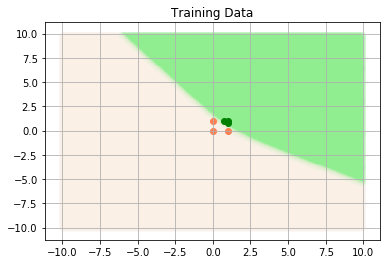

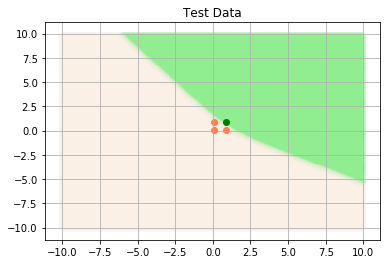

In [120]:
main(make_neural_net_two_layer,
                 simple_data_sets)

----------------------------------------
Training on EQUAL data
weights: [wA(-2.91), w1A(-5.82), w2A(6.02), wB(3.52), w1B(-6.69), w2B(6.54), wC(4.60), wAC(9.62), wBC(-9.78)]
Trained weights:
Weight 'wA': -2.909986
Weight 'w1A': -5.817158
Weight 'w2A': 6.016332
Weight 'wB': 3.523838
Weight 'w1B': -6.692302
Weight 'w2B': 6.543941
Weight 'wC': 4.599405
Weight 'wAC': 9.615746
Weight 'wBC': -9.784380
Testing on EQUAL test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


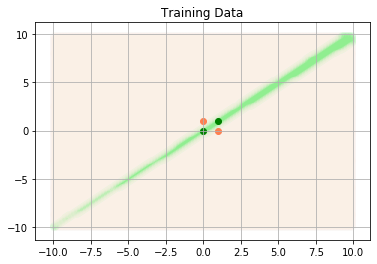

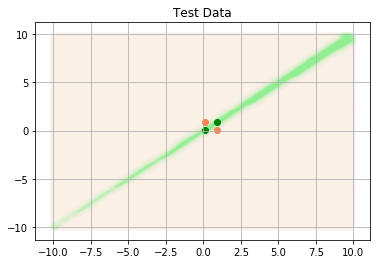

----------------------------------------
Training on NOT_EQUAL data
weights: [wA(-2.91), w1A(-5.82), w2A(6.02), wB(3.52), w1B(-6.69), w2B(6.54), wC(-4.60), wAC(-9.62), wBC(9.78)]
Trained weights:
Weight 'wA': -2.909986
Weight 'w1A': -5.817158
Weight 'w2A': 6.016332
Weight 'wB': 3.523838
Weight 'w1B': -6.692302
Weight 'w2B': 6.543941
Weight 'wC': -4.599405
Weight 'wAC': -9.615746
Weight 'wBC': 9.784380
Testing on NOT_EQUAL test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


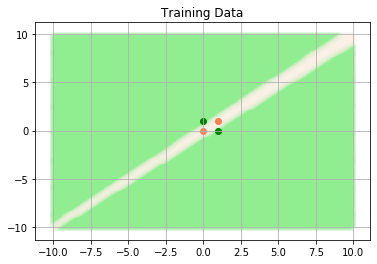

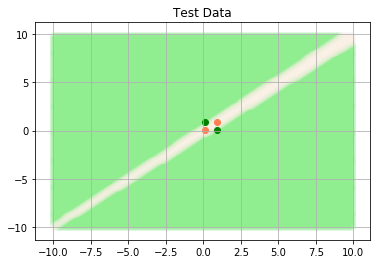

----------------------------------------
Training on horizontal-bands data
weights: [wA(-2.82), w1A(0.22), w2A(-6.35), wB(10.30), w1B(-0.07), w2B(4.13), wC(-5.08), wAC(-9.88), wBC(-10.61)]
Trained weights:
Weight 'wA': -2.818285
Weight 'w1A': 0.221394
Weight 'w2A': -6.347877
Weight 'wB': 10.296005
Weight 'w1B': -0.074033
Weight 'w2B': 4.125834
Weight 'wC': -5.075890
Weight 'wAC': -9.882344
Weight 'wBC': -10.611049
Testing on horizontal-bands test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


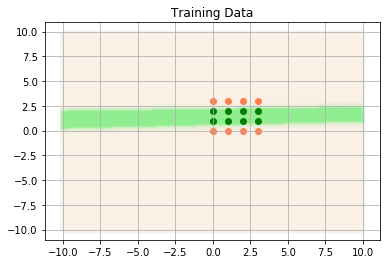

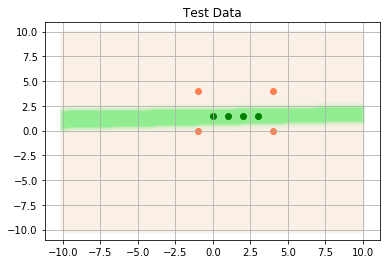

----------------------------------------
Training on vertical-bands data
weights: [wA(-10.06), w1A(-4.14), w2A(0.07), wB(-2.93), w1B(-6.29), w2B(0.25), wC(5.07), wAC(10.49), wBC(-10.20)]
Trained weights:
Weight 'wA': -10.056994
Weight 'w1A': -4.142093
Weight 'w2A': 0.072260
Weight 'wB': -2.926876
Weight 'w1B': -6.290164
Weight 'w2B': 0.253718
Weight 'wC': 5.067693
Weight 'wAC': 10.494427
Weight 'wBC': -10.200516
Testing on vertical-bands test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


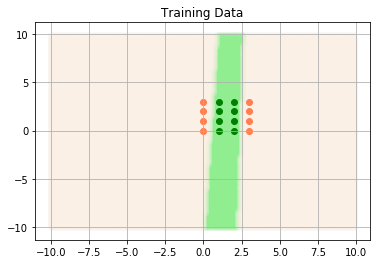

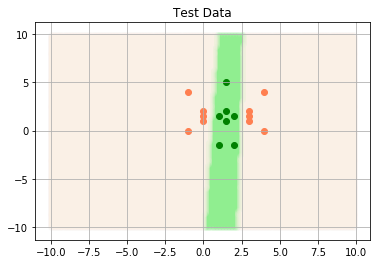

----------------------------------------
Training on diagonal-band data
weights: [wA(3.56), w1A(3.63), w2A(-3.94), wB(3.67), w1B(-4.02), w2B(3.72), wC(-4.21), wAC(-8.87), wBC(-8.85)]
Trained weights:
Weight 'wA': 3.561586
Weight 'w1A': 3.632440
Weight 'w2A': -3.941064
Weight 'wB': 3.670820
Weight 'w1B': -4.019145
Weight 'w2B': 3.717343
Weight 'wC': -4.213936
Weight 'wAC': -8.865842
Weight 'wBC': -8.854844
Testing on diagonal-band test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


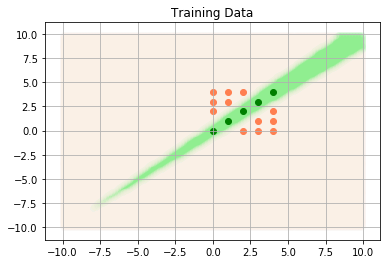

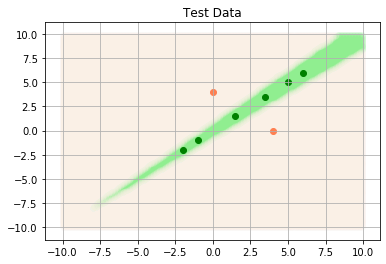

----------------------------------------
Training on inverse-diagonal-band data
weights: [wA(3.56), w1A(3.63), w2A(-3.94), wB(3.67), w1B(-4.02), w2B(3.72), wC(4.21), wAC(8.87), wBC(8.85)]
Trained weights:
Weight 'wA': 3.561586
Weight 'w1A': 3.632440
Weight 'w2A': -3.941064
Weight 'wB': 3.670820
Weight 'w1B': -4.019145
Weight 'w2B': 3.717343
Weight 'wC': 4.213936
Weight 'wAC': 8.865842
Weight 'wBC': 8.854844
Testing on inverse-diagonal-band test-data
Accuracy Test Data: 1.000000
Accuracy Train Data: 1.000000


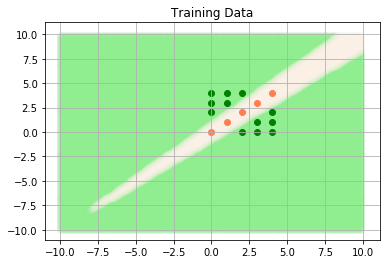

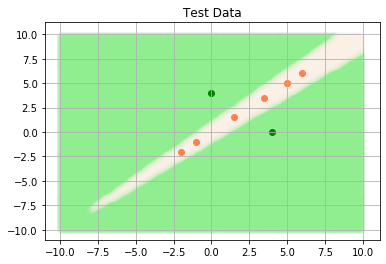

In [121]:
main(make_neural_net_two_layer,
                 harder_data_sets)

# Part 8) Overfitting & Regularization

In [122]:
def make_neural_net_two_moons():
    """
    Create an overparametrized network with 40 neurons in the first layer
    and a single neuron in the last. This network is more than enough to solve
    the two-moons dataset, and as a result will over-fit the data if trained
    excessively.

    See 'make_neural_net_basic' for required naming convention for inputs,
    weights, and neurons.
    """
    # raise NotImplementedError("Implement me!")
    i0 = Input('i0', -1.0)  # this input is immutable
    i1 = Input('i1', 0.0)
    i2 = Input('i2', 0.0)

    seed_random()
    neuron_names = ["%02d" % x for x in range(1, 41)]
    wAxxCs = list()
    neurons = list()
    for name in neuron_names:
        w1A = Weight("w1A" + name, random_weight())  # from i1
        w2A = Weight("w2A" + name, random_weight())  # from i2
        wA = Weight("wA" + name, random_weight())  # from i0
        neurons.append(Neuron('A' + name, [i1, i2, i0], [w1A, w2A, wA]))
        wAxxCs.append(Weight('wA' + name + 'C', random_weight()))

    wC = Weight('wC', random_weight())
    # Inputs must be in the same order as their associated weights
    C = Neuron('C', [i0] + neurons, [wC] + wAxxCs)
    P = PerformanceElem(C, 0.0)

    # Package all the components into a network
    # First list the PerformanceElem P, Then list all neurons afterwards
    net = Network(P, neurons + [C])

    return net

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.03), w2A01(-0.25), wA01(-0.25), w1A02(0.78), w2A02(-0.36), wA02(0.58), w1A03(-0.56), w2A03(0.64), wA03(1.20), w1A04(0.85), w2A04(-0.79), wA04(0.56), w1A05(-0.99), w2A05(0.49), wA05(0.47), w1A06(1.22), w2A06(0.92), wA06(-0.65), w1A07(-1.29), w2A07(0.33), wA07(-0.44), w1A08(-0.56), w2A08(0.64), wA08(1.20), w1A09(0.77), w2A09(-0.97), wA09(0.58), w1A10(1.23), w2A10(-1.45), wA10(1.42), w1A11(-0.68), w2A11(1.59), wA11(0.67), w1A12(0.75), w2A12(-1.72), wA12(-0.06), w1A13(0.24), w2A13(0.31), wA13(1.40), w1A14(-0.77), w2A14(1.18), wA14(0.50), w1A15(-0.99), w2A15(0.49), wA15(0.47), w1A16(-3.95), w2A16(-1.57), wA16(2.19), w1A17(-1.29), w2A17(-1.12), wA17(1.28), w1A18(-2.41), w2A18(-2.17), wA18(-0.98), w1A19(0.97), w2A19(-1.81), wA19(0.81), w1A20(0.80), w2A20(0.61), wA20(-0.63), w1A21(0.80), w2A21(0.61), wA21(-0.63), w1A22(0.93), w2A22(0.97), wA22(0.78), w1A23(-0.77), w2A23(1.18), wA23(0.50), w1A24(0.85), w2A24(

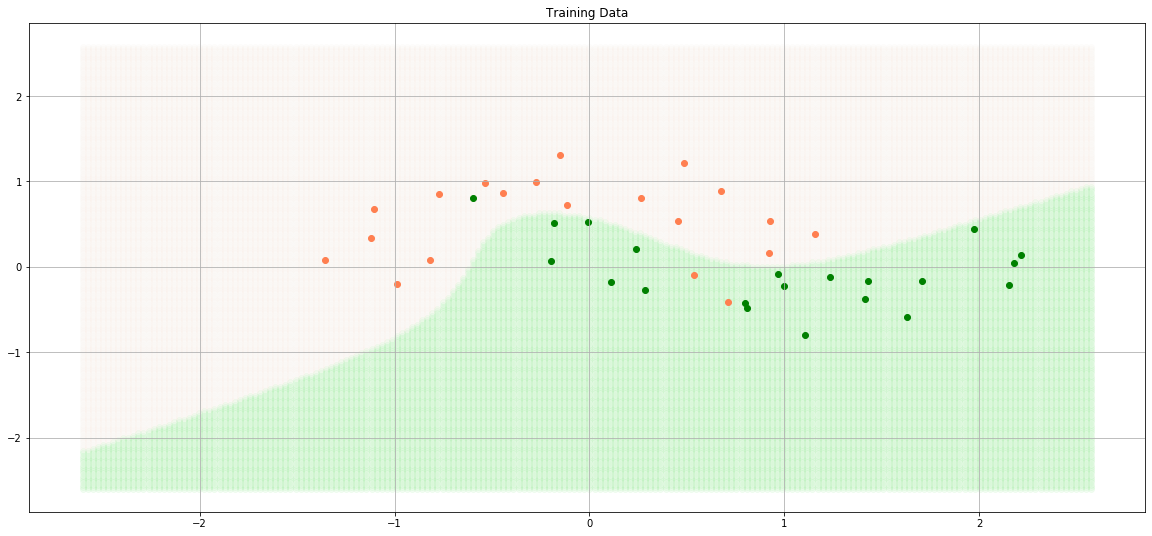

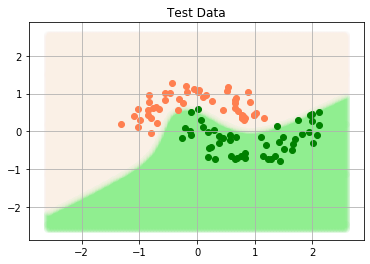

In [123]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=100, plot_boundry=2.6)

----------------------------------------
Training on two-moons data
weights: [w1A01(0.27), w2A01(-0.80), wA01(0.33), w1A02(1.08), w2A02(-0.91), wA02(0.71), w1A03(-0.67), w2A03(0.89), wA03(1.78), w1A04(1.10), w2A04(-1.12), wA04(0.60), w1A05(-0.85), w2A05(0.12), wA05(1.24), w1A06(1.37), w2A06(0.21), wA06(-0.14), w1A07(-1.02), w2A07(-0.30), wA07(0.63), w1A08(-0.67), w2A08(0.89), wA08(1.78), w1A09(1.26), w2A09(-1.44), wA09(0.59), w1A10(1.80), w2A10(-1.72), wA10(1.54), w1A11(-0.77), w2A11(1.84), wA11(1.85), w1A12(1.17), w2A12(-1.92), wA12(-0.11), w1A13(0.57), w2A13(-0.06), wA13(1.54), w1A14(-0.79), w2A14(1.20), wA14(1.50), w1A15(-0.85), w2A15(0.12), wA15(1.24), w1A16(-8.08), w2A16(-3.24), wA16(3.75), w1A17(-1.70), w2A17(-1.45), wA17(1.63), w1A18(-5.47), w2A18(-5.77), wA18(-3.12), w1A19(1.54), w2A19(-1.90), wA19(0.91), w1A20(1.04), w2A20(-0.34), wA20(-0.01), w1A21(1.04), w2A21(-0.34), wA21(-0.01), w1A22(0.95), w2A22(0.90), wA22(1.31), w1A23(-0.79), w2A23(1.20), wA23(1.50), w1A24(1.10), w2A24

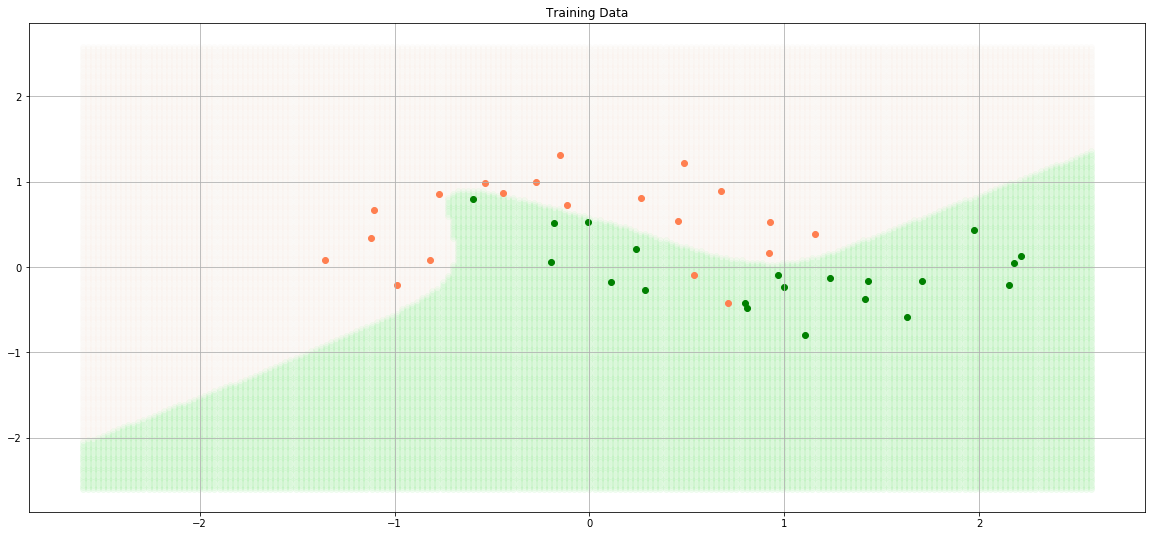

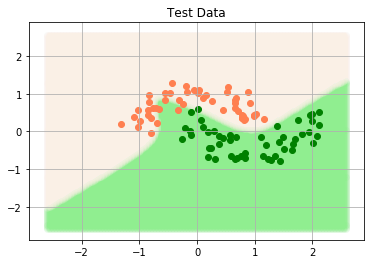

In [124]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=500, plot_boundry=2.6)

----------------------------------------
Training on two-moons data
weights: [w1A01(0.38), w2A01(-0.79), wA01(0.31), w1A02(1.12), w2A02(-0.86), wA02(0.70), w1A03(-0.78), w2A03(0.94), wA03(1.81), w1A04(1.12), w2A04(-1.06), wA04(0.59), w1A05(-0.89), w2A05(0.11), wA05(1.26), w1A06(1.38), w2A06(0.19), wA06(-0.18), w1A07(-1.02), w2A07(-0.33), wA07(0.68), w1A08(-0.78), w2A08(0.94), wA08(1.81), w1A09(1.24), w2A09(-1.33), wA09(0.65), w1A10(1.81), w2A10(-1.75), wA10(1.76), w1A11(-0.84), w2A11(1.83), wA11(2.09), w1A12(1.12), w2A12(-1.64), wA12(-0.13), w1A13(0.66), w2A13(-0.06), wA13(1.51), w1A14(-0.88), w2A14(1.20), wA14(1.61), w1A15(-0.89), w2A15(0.11), wA15(1.26), w1A16(-9.51), w2A16(-3.24), wA16(4.63), w1A17(-1.89), w2A17(-1.49), wA17(1.61), w1A18(-5.68), w2A18(-6.79), wA18(-3.48), w1A19(1.51), w2A19(-1.85), wA19(1.15), w1A20(1.07), w2A20(-0.35), wA20(-0.04), w1A21(1.07), w2A21(-0.35), wA21(-0.04), w1A22(0.95), w2A22(0.90), wA22(1.33), w1A23(-0.88), w2A23(1.20), wA23(1.61), w1A24(1.12), w2A24

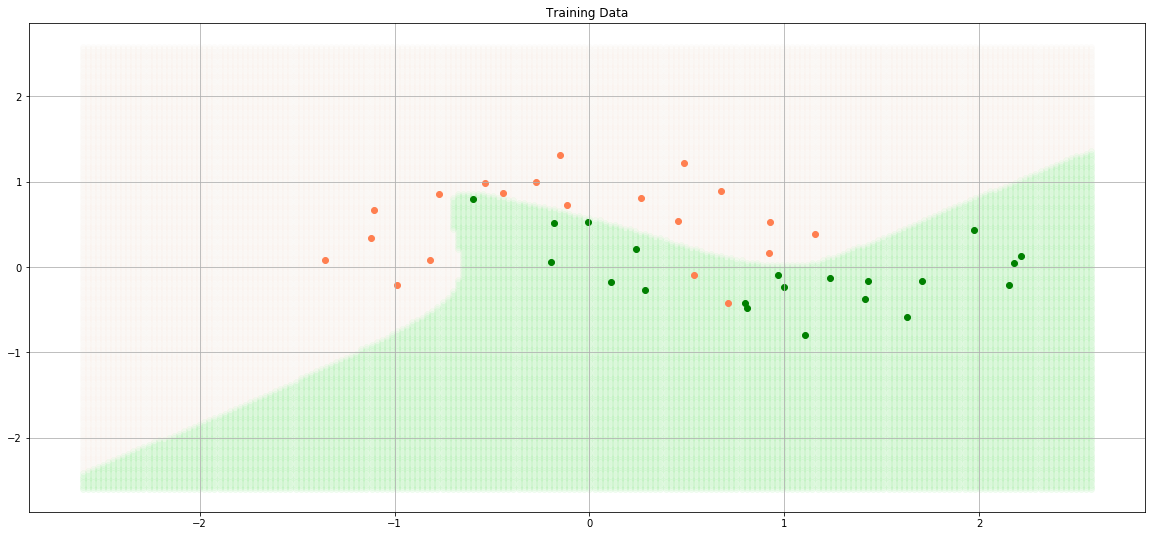

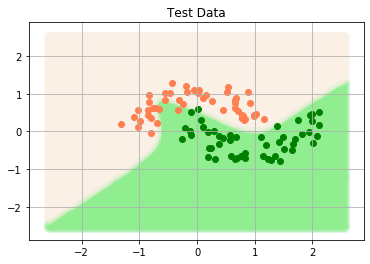

In [125]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=1000, plot_boundry=2.6)

----------------------------------------
Training on two-moons data
weights: [w1A01(0.61), w2A01(-0.75), wA01(0.24), w1A02(1.19), w2A02(-0.81), wA02(0.82), w1A03(-0.89), w2A03(1.05), wA03(1.83), w1A04(1.17), w2A04(-0.99), wA04(0.72), w1A05(-0.94), w2A05(0.14), wA05(1.26), w1A06(1.26), w2A06(0.15), wA06(-0.22), w1A07(-1.03), w2A07(-0.32), wA07(0.69), w1A08(-0.89), w2A08(1.05), wA08(1.83), w1A09(1.31), w2A09(-1.23), wA09(0.97), w1A10(2.21), w2A10(-1.90), wA10(2.38), w1A11(-0.91), w2A11(1.95), wA11(2.33), w1A12(0.97), w2A12(-1.28), wA12(-0.11), w1A13(0.97), w2A13(-0.06), wA13(1.44), w1A14(-0.93), w2A14(1.26), wA14(1.72), w1A15(-0.94), w2A15(0.14), wA15(1.26), w1A16(-11.81), w2A16(-3.26), wA16(6.07), w1A17(-2.08), w2A17(-1.54), wA17(1.64), w1A18(-6.36), w2A18(-8.37), wA18(-4.25), w1A19(1.86), w2A19(-1.90), wA19(1.84), w1A20(1.01), w2A20(-0.36), wA20(-0.03), w1A21(1.01), w2A21(-0.36), wA21(-0.03), w1A22(0.97), w2A22(0.89), wA22(1.33), w1A23(-0.93), w2A23(1.26), wA23(1.72), w1A24(1.17), w2A2

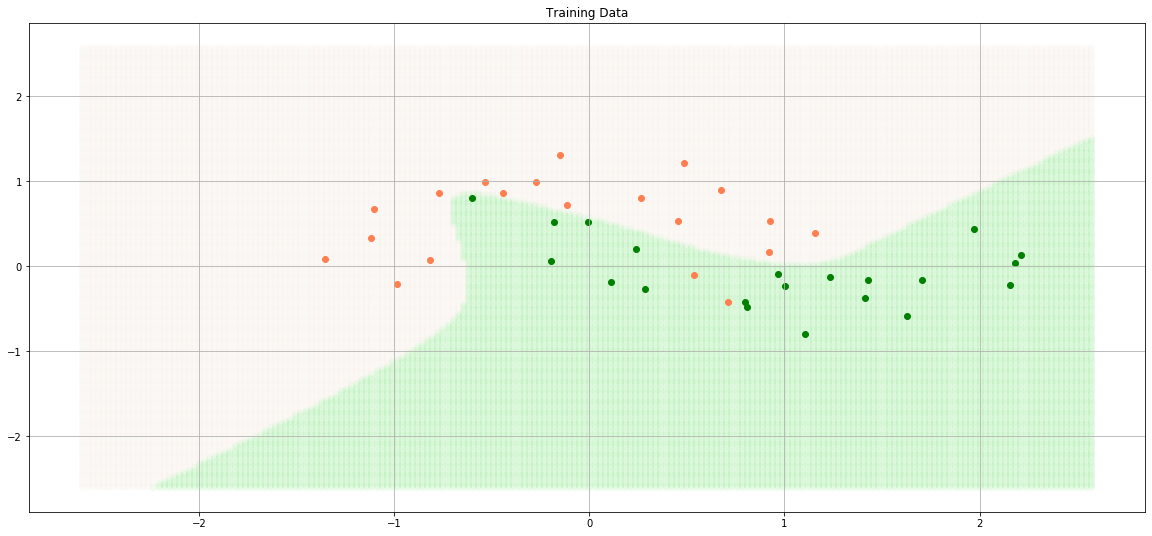

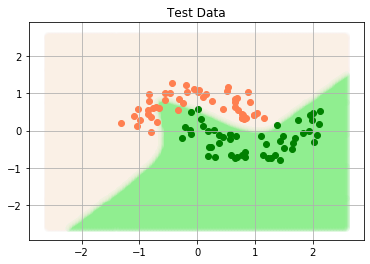

In [126]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons, two_moons_data_set, max_iterations=10000, plot_boundry=2.6)

| max_iterations | Train Accuracy | Test Accuracy |
| --- | --- | --- |
| 100 | 0.926829 | 0.980000 |
| 500 | 0.951220 | 0.940000 |
| 1000 | 0.951220 | 0.950000 |
| 10000 | 0.951220 | 0.950000 |

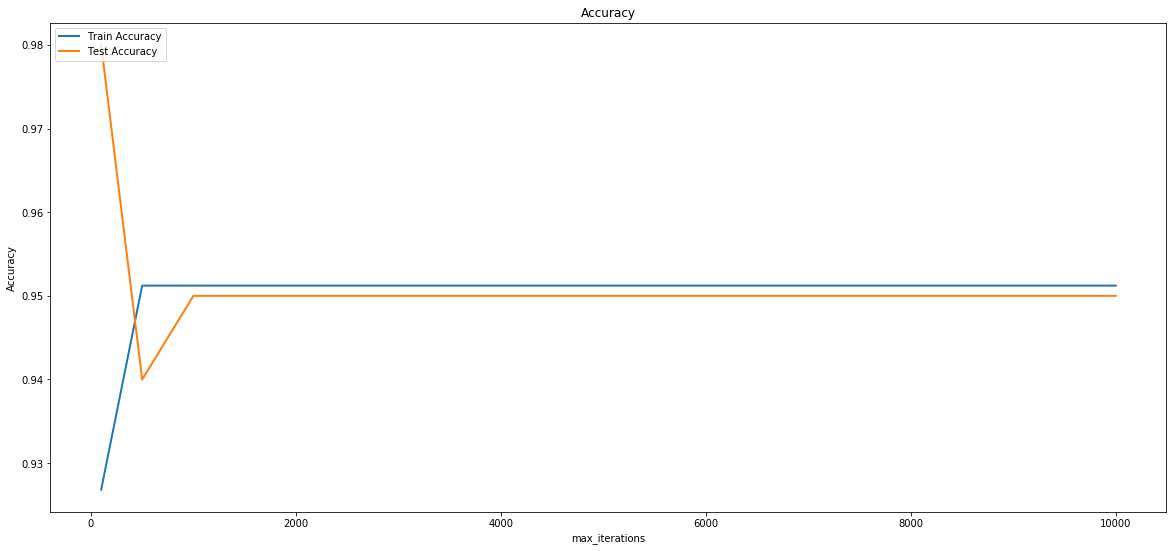

In [131]:
iters = [100, 500, 1000, 10000]
train_accuracy = [0.926829, 0.951220, 0.951220, 0.951220]
test_accuracy = [0.980000, 0.940000, 0.950000, 0.950000]

plt.figure(figsize=(20, 9))
plt.plot(iters, train_accuracy, label="Train Accuracy", linewidth=2)
plt.plot(iters, test_accuracy, label="Test Accuracy", linewidth=2)
plt.title("Accuracy")
plt.xlabel("max_iterations")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.show()

Overfitting is a modeling error that occurs when a function is too closely fit to a limited set of data points. Overfitting the model generally takes the form of making an overly complex model to explain idiosyncrasies in the data under study.

Here we see that as we increase the number of iterations, the model tries to overfit the train data which can have noises and cause lower test accuracy, and vice versa.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/300px-Overfitting.svg.png" />

## Regularization (L2 norm)

<img src="https://miro.medium.com/max/500/1*mO9tXV5Ml4Rb8tcbs4xg_w.gif" />
<img src="https://miro.medium.com/max/628/1*FfBxNNuFoCnzq8eEzPrRcw@2x.png" />


$$ \frac{dP_{l2 norm}(o)}{{dw}} = \frac{dP(o)}{{dw}} - \lambda \times 2 \times w $$

## neural_net.py

In [148]:

class RegularizedPerformanceElem(PerformanceElem):
    """
    Representation of a performance computing output node.
    This element contains methods for setting the
    desired output (d) and also computing the final
    performance P of the network.

    This implementation assumes a single output.
    """

    def __init__(self, input, desired_value):
        assert isinstance(input, (Input, Neuron))
        DifferentiableElement.__init__(self)
        self.my_input = input
        self.my_desired_val = desired_value
        self.regularization_lambda = 0.0001
        self.weights = None

    def set_weights(self, _weights):
        self.weights = _weights

    def output(self):
        """
        Returns the output of this PerformanceElem node.
        returns: number (float/int)
        """
        # raise NotImplementedError("Implement me!")
        old_out = -0.5 * (self.my_desired_val - self.my_input.output()) ** 2
        return old_out - self.regularization_lambda * self.w_l2_sum()

    def w_l2_sum(self):
        l2_sum = 0
        for w in self.weights:
            l2_sum += w.get_value() ** 2
        return l2_sum

    def dOutdX(self, elem):
        """
        Returns the derivative of this PerformanceElem node with respect
        to some weight, given by elem.
        elem: an instance of Weight
        returns: number (int/float)
        """
        # raise NotImplementedError("Implement me!")
        old_dout = (self.my_desired_val - self.my_input.output()) * self.my_input.dOutdX(elem)
        return old_dout - self.regularization_lambda * elem.get_value() * 2

    def set_desired(self, new_desired):
        self.my_desired_val = new_desired

    def get_input(self):
        return self.my_input

## neural_net_tester.py

In [149]:
# Unit tester for neural_net.py
#
import sys

if __name__ == "__main__":
    test_names = ["simple"]
    if len(sys.argv) > 1:
        test_names = sys.argv[1:]

    for test_name in test_names:
        if test_name == "simple":
            # these test simple logical configurations
            main(make_neural_net_basic,
                 simple_data_sets)

        elif test_name == "two_layer":
            # these test cases are slightly harder
            main(make_neural_net_two_layer,
                 simple_data_sets + harder_data_sets)

        elif test_name == "challenging":
            # these tests require a more complex architecture.
            main(make_neural_net_challenging, challenging_data_sets)

        elif test_name == "two_moons":
            # this dataset illustrates the overfitting problem
            main(make_neural_net_two_moons, two_moons_data_set, max_iterations=1000)

        elif test_name == "two_moons_l2":
            # this dataset illustrates the overfitting problem
            main(make_neural_net_two_moons_l2, two_moons_data_set, max_iterations=1000)

        else:
            print("unrecognized test name %s" %(test_name))


unrecognized test name -f
unrecognized test name C:\Users\Mohsen\AppData\Roaming\jupyter\runtime\kernel-8381059a-8d81-4f50-8471-c4c498c2907c.json


----------------------------------------
Training on two-moons data
weights: [w1A01(-0.02), w2A01(-0.19), wA01(0.11), w1A02(0.42), w2A02(-0.34), wA02(0.44), w1A03(-0.39), w2A03(0.44), wA03(0.62), w1A04(0.43), w2A04(-0.50), wA04(0.44), w1A05(-0.47), w2A05(0.23), wA05(0.37), w1A06(0.50), w2A06(0.23), wA06(0.02), w1A07(-0.53), w2A07(0.12), wA07(-0.01), w1A08(-0.39), w2A08(0.44), wA08(0.62), w1A09(0.54), w2A09(-0.82), wA09(0.44), w1A10(0.71), w2A10(-1.00), wA10(0.69), w1A11(-0.52), w2A11(1.16), wA11(0.29), w1A12(0.68), w2A12(-1.37), wA12(0.38), w1A13(0.08), w2A13(0.03), wA13(0.76), w1A14(-0.53), w2A14(0.77), wA14(0.30), w1A15(-0.47), w2A15(0.23), wA15(0.37), w1A16(-2.96), w2A16(-1.31), wA16(1.71), w1A17(-0.66), w2A17(-0.46), wA17(0.68), w1A18(-0.33), w2A18(-1.26), wA18(-0.35), w1A19(0.74), w2A19(-1.37), wA19(0.53), w1A20(0.42), w2A20(0.03), wA20(0.00), w1A21(0.42), w2A21(0.03), wA21(0.00), w1A22(0.26), w2A22(0.48), wA22(0.57), w1A23(-0.53), w2A23(0.77), wA23(0.30), w1A24(0.43), w2A24(-0.50

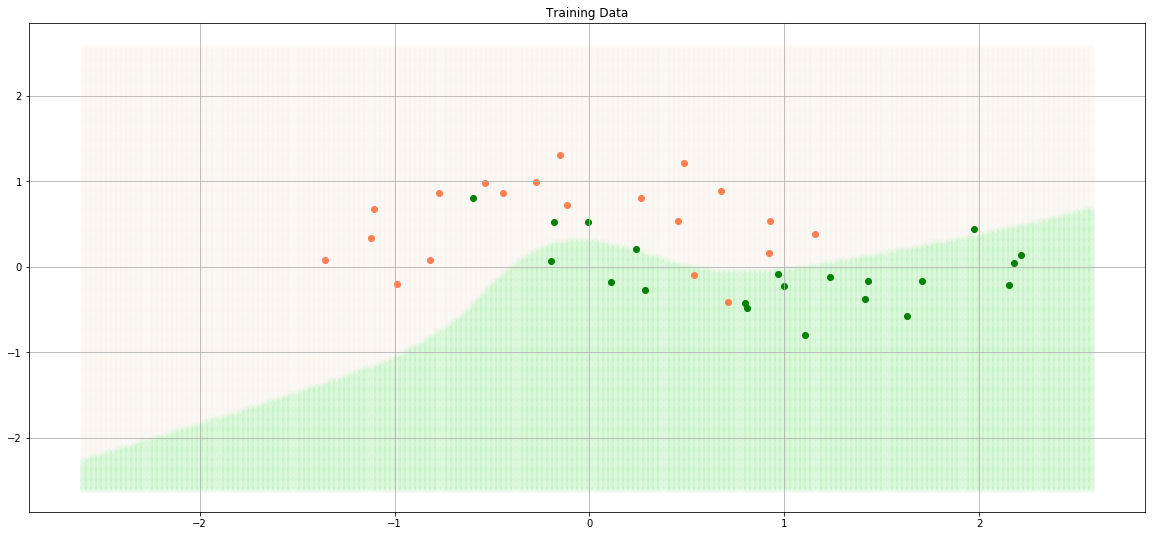

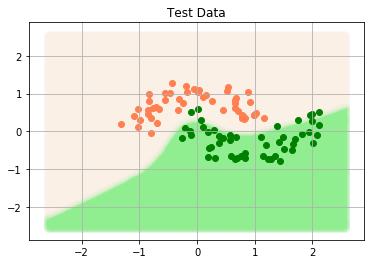

In [150]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons_l2, two_moons_data_set, max_iterations=100, plot_boundry=2.6)

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.45), w2A01(0.18), wA01(0.46), w1A02(0.27), w2A02(-0.49), wA02(0.49), w1A03(-0.62), w2A03(0.76), wA03(0.37), w1A04(0.33), w2A04(-0.56), wA04(0.48), w1A05(-0.61), w2A05(0.63), wA05(0.38), w1A06(-0.24), w2A06(-0.04), wA06(0.50), w1A07(-0.61), w2A07(0.61), wA07(0.38), w1A08(-0.62), w2A08(0.76), wA08(0.37), w1A09(0.50), w2A09(-0.77), wA09(0.47), w1A10(0.53), w2A10(-0.82), wA10(0.47), w1A11(-0.63), w2A11(0.94), wA11(0.37), w1A12(0.56), w2A12(-0.87), wA12(0.47), w1A13(-0.42), w2A13(0.16), wA13(0.48), w1A14(-0.63), w2A14(0.86), wA14(0.36), w1A15(-0.61), w2A15(0.63), wA15(0.38), w1A16(-1.99), w2A16(-2.11), wA16(1.09), w1A17(-0.58), w2A17(0.43), wA17(0.41), w1A18(0.41), w2A18(-0.68), wA18(0.45), w1A19(0.56), w2A19(-0.88), wA19(0.47), w1A20(-0.02), w2A20(-0.24), wA20(0.50), w1A21(-0.02), w2A21(-0.24), wA21(0.50), w1A22(-0.58), w2A22(0.54), wA22(0.41), w1A23(-0.63), w2A23(0.86), wA23(0.36), w1A24(0.33), w2A24(-0

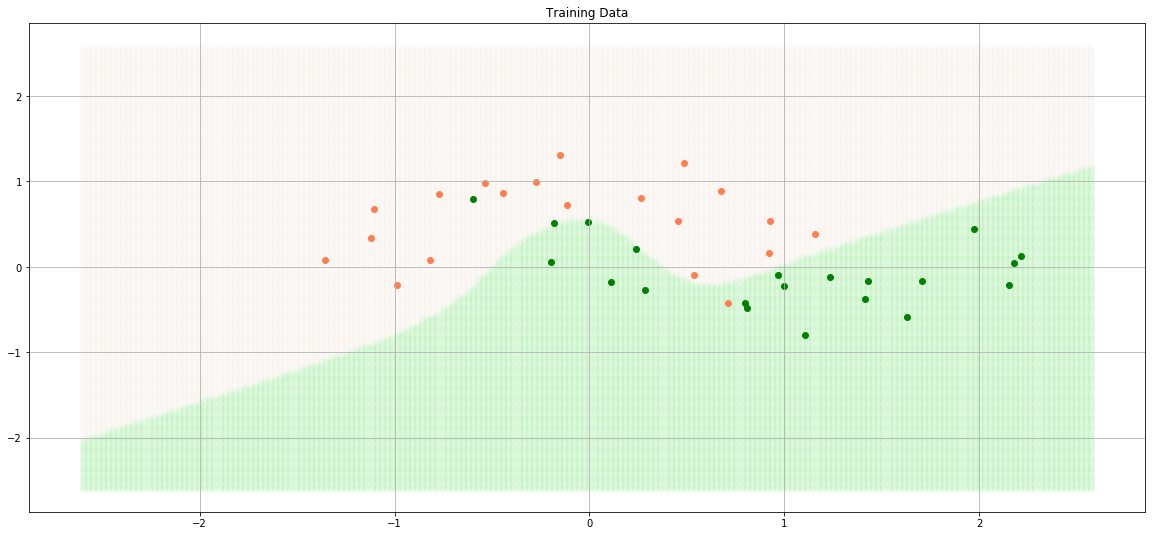

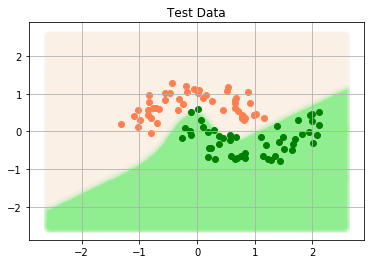

In [151]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons_l2, two_moons_data_set, max_iterations=500, plot_boundry=2.6)

----------------------------------------
Training on two-moons data
weights: [w1A01(-0.56), w2A01(0.52), wA01(0.41), w1A02(0.34), w2A02(-0.61), wA02(0.46), w1A03(-0.59), w2A03(0.78), wA03(0.39), w1A04(0.40), w2A04(-0.68), wA04(0.45), w1A05(-0.59), w2A05(0.74), wA05(0.39), w1A06(-0.51), w2A06(0.32), wA06(0.45), w1A07(-0.59), w2A07(0.74), wA07(0.39), w1A08(-0.59), w2A08(0.78), wA08(0.39), w1A09(0.48), w2A09(-0.79), wA09(0.44), w1A10(0.49), w2A10(-0.80), wA10(0.44), w1A11(-0.59), w2A11(0.83), wA11(0.39), w1A12(0.49), w2A12(-0.82), wA12(0.44), w1A13(-0.56), w2A13(0.50), wA13(0.41), w1A14(-0.59), w2A14(0.81), wA14(0.39), w1A15(-0.59), w2A15(0.74), wA15(0.39), w1A16(-1.97), w2A16(-2.26), wA16(1.05), w1A17(-0.58), w2A17(0.67), wA17(0.39), w1A18(0.45), w2A18(-0.75), wA18(0.44), w1A19(0.49), w2A19(-0.82), wA19(0.44), w1A20(-0.29), w2A20(-0.01), wA20(0.49), w1A21(-0.29), w2A21(-0.01), wA21(0.49), w1A22(-0.59), w2A22(0.71), wA22(0.39), w1A23(-0.59), w2A23(0.81), wA23(0.39), w1A24(0.40), w2A24(-0.

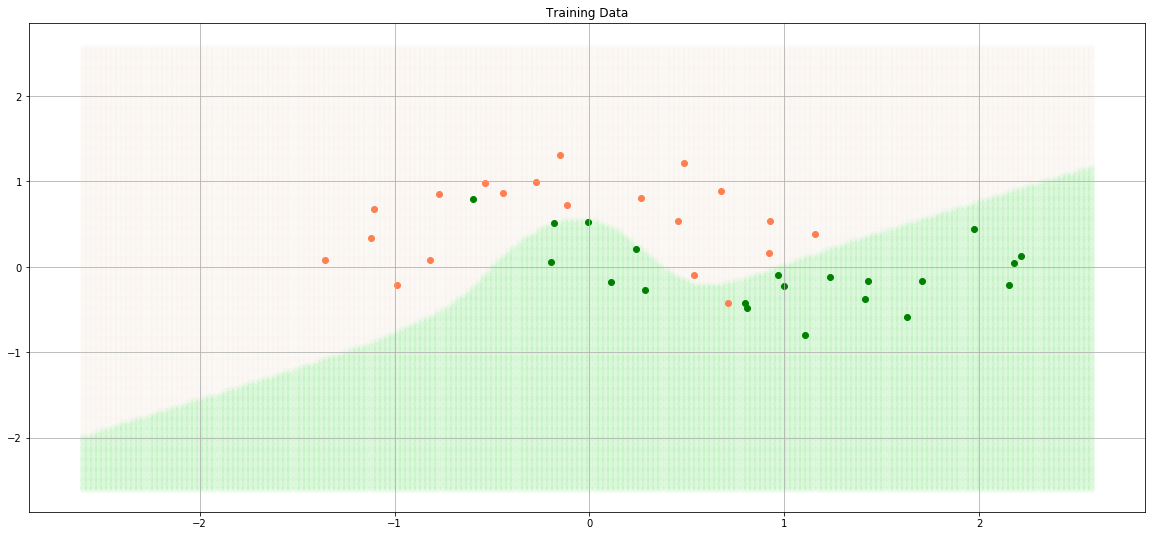

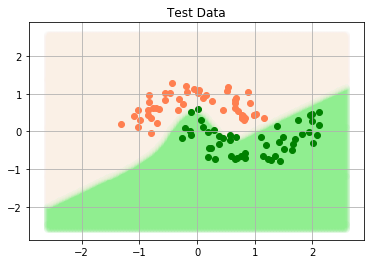

In [152]:
plt.figure(figsize=(20, 9))
main(make_neural_net_two_moons_l2, two_moons_data_set, max_iterations=1000, plot_boundry=2.6)

| max_iterations | Train Accuracy | Test Accuracy |
| --- | --- | --- |
| 100 | 0.829268 | 0.920000 |
| 500 | 0.926829 | 0.970000 |
| 1000 | 0.951220 | 0.970000 |

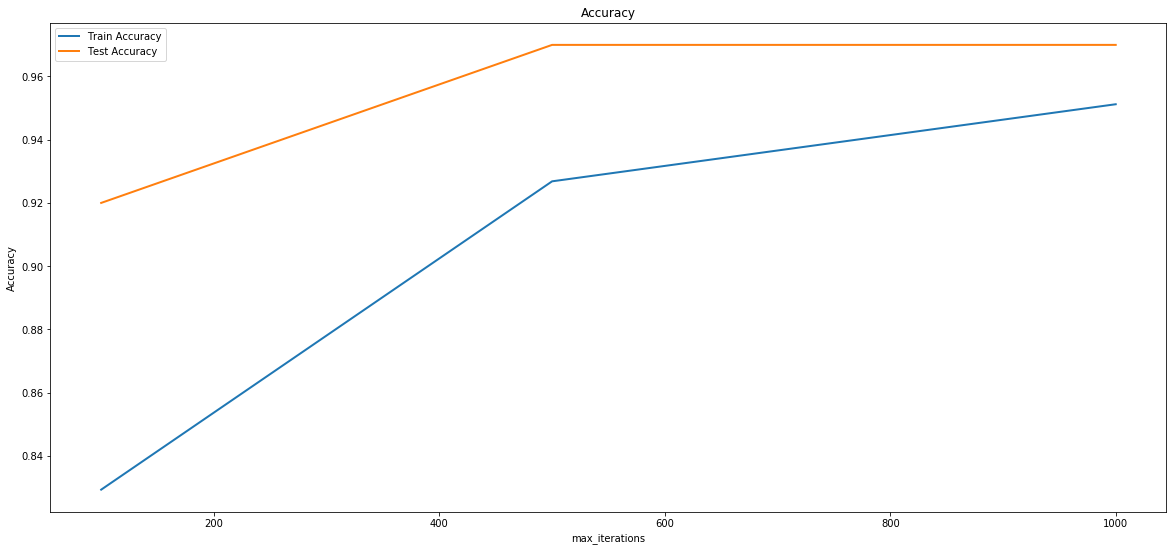

In [154]:
iters = [100, 500, 1000]
train_accuracy = [0.829268, 0.926829, 0.951220]
test_accuracy = [0.920000, 0.970000, 0.970000]

plt.figure(figsize=(20, 9))
plt.plot(iters, train_accuracy, label="Train Accuracy", linewidth=2)
plt.plot(iters, test_accuracy, label="Test Accuracy", linewidth=2)
plt.title("Accuracy")
plt.xlabel("max_iterations")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.show()

One of the first methods we should try when we need to reduce overfitting is regularisation. It involves adding an extra element to the loss function, which punishes our model for being too complex or, in simple words, for using too high values in the weight matrix. This way we try to limit its flexibility, but also encourage it to build solutions based on multiple features. Two popular versions of this method are L1 - Least Absolute Deviations (LAD) and L2 - Least Square Errors (LS).

L2 method solved the overfitting problem by simplifying the boundries, because now we can see in the plots, that the model won't try to cover all of the data, even if they look like to be noises and out of reach. Instead, it has drawn a slighter curve between two classes.

In the previously mentioned formulas for regularisation in both versions of L1 and L2, I introduced hyperparameter λ — also called regularization rate. When choosing its value we try to hit the sweet spot between simplicity of our model and fitting it to the training data. So I chose 0.0001 here.

